
# Описание проекта

Вам предоставлена выгрузка заказов из CRM компании, занимающейся В2В-продажами.  На основе
этих данных вам нужно подготовить дашборд для директора компании, который даст общее
понимание ситуации с продажами, наглядно покажет ответы на вопросы:

1. Как менеджеры выполняют план продаж?
2. Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»?
3. Какова география продаж, какие регионы самые доходные?
4. Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?
5. Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

Дашборд должен дать информацию для принятия решений:
Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
Расширять самые доходные каналы продаж, регионы, где есть высокий спрос


Задание

Откройте файл с данными и изучите общую информацию
Подготовьте данные
Проведите исследовательский анализ данных
Составьте портрет менеджера каждого региона
Проведите исследование статистических показателей
Проверьте гипотезы
Напишите общий вывод


# Загрузка данных, изучение общей информации

In [1]:
import pandas as pd

# Загрузка данных из Excel
data = pd.read_excel('data.xlsx')

# Изучаем общую информацию о данных
print(data.info())
print(data.describe())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Номер заказа                  116 non-null    int64         
 1   Канал продаж                  116 non-null    object        
 2   Продуктовый сегмент           116 non-null    object        
 3   Менеджер                      116 non-null    object        
 4   Название заказа               116 non-null    object        
 5   Продавец                      116 non-null    object        
 6   Город                         116 non-null    object        
 7   Продажи факт, тыс.руб         116 non-null    int64         
 8   Продажи план, тыс.руб         116 non-null    int64         
 9   Дата сделки                   116 non-null    datetime64[ns]
 10  Дата оплаты                   93 non-null     datetime64[ns]
 11  Дней между сделкой и оплатой  11

# Подготовка данных

Замените названия столбцов при необходимости (приведите к нижнему регистру); Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; Обработайте пропуски при необходимости: Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; Опишите причины, которые могли привести к пропускам; Посчитайте суммарные фактические продажи по всем городам и запишите их в отдельный столбец.

In [2]:
# Приведение названий столбцов к нижнему регистру
data.columns = data.columns.str.lower()

# Преобразование типов данных
data['дата сделки'] = pd.to_datetime(data['дата сделки'], format='%d.%m.%Y')
data['дата оплаты'] = pd.to_datetime(data['дата оплаты'], format='%d.%m.%Y')
data['продажи факт, тыс.руб'] = pd.to_numeric(data['продажи факт, тыс.руб'], errors='coerce')
data['продажи план, тыс.руб'] = pd.to_numeric(data['продажи план, тыс.руб'], errors='coerce')
data['дней между сделкой и оплатой'] = pd.to_numeric(data['дней между сделкой и оплатой'], errors='coerce')

# Обработка пропусков
data['продажи факт, тыс.руб'].fillna(0, inplace=True)  # Пропуски в продажах факта заменим на 0
data['продажи план, тыс.руб'].fillna(0, inplace=True)  # Пропуски в плановых продажах заменим на 0
data['дней между сделкой и оплатой'].fillna(data['дней между сделкой и оплатой'].median(), inplace=True)  # Заполняем медианой

# Подсчёт суммарных фактических продаж по городам
data['суммарные продажи, тыс.руб'] = data.groupby('город')['продажи факт, тыс.руб'].transform('sum')


# Исследовательский анализ данных

Проведите исследовательский анализ данных

Посмотрите, как менеджеры выполняют план продаж.  Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»? Важны ли данные за все периоды? Посмотрите, как менялись продажи по продуктовым сегментам. Выберите сегменты с наибольшими суммарными продажами и постройте распределение по месяцам. Есть ли популярные в прошлом сегменты, у которых сейчас продажи на нуле. 

Какова география продаж, какие регионы самые доходные?

Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?

Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

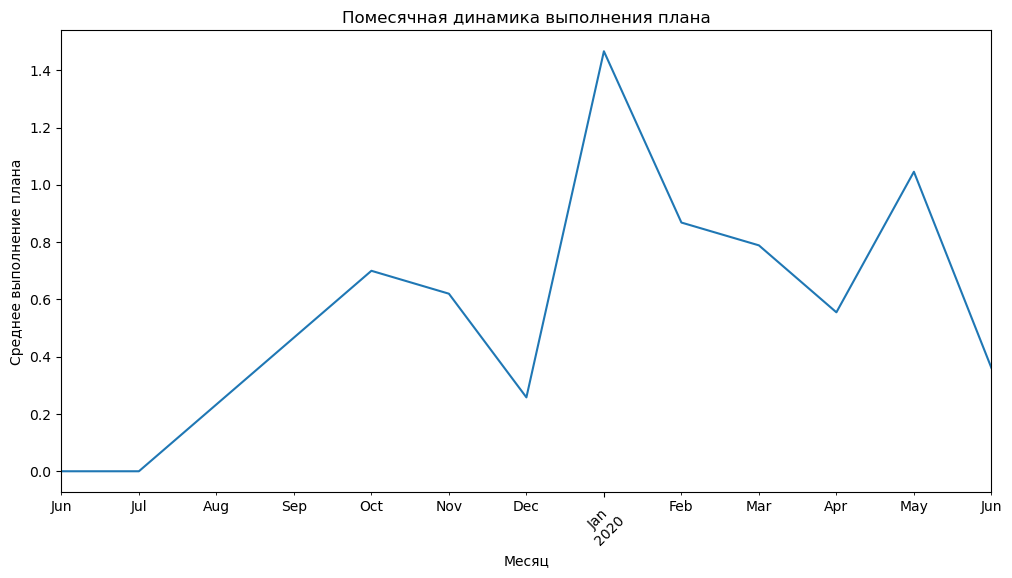

продуктовый сегмент
Оборудование              35099
Другое                     7225
Свет                       6950
Ткань и аксессуары         5712
Одежда                     4650
Электронные устройства     2130
Бассейн                    1500
Сувениры                    970
Спорт товары                750
Автозапчасти                700
Упаковка                    675
Медецина                    400
Игрушки                     250
Косметика                   200
Охота и рыбалка               0
Name: продажи факт, тыс.руб, dtype: int64


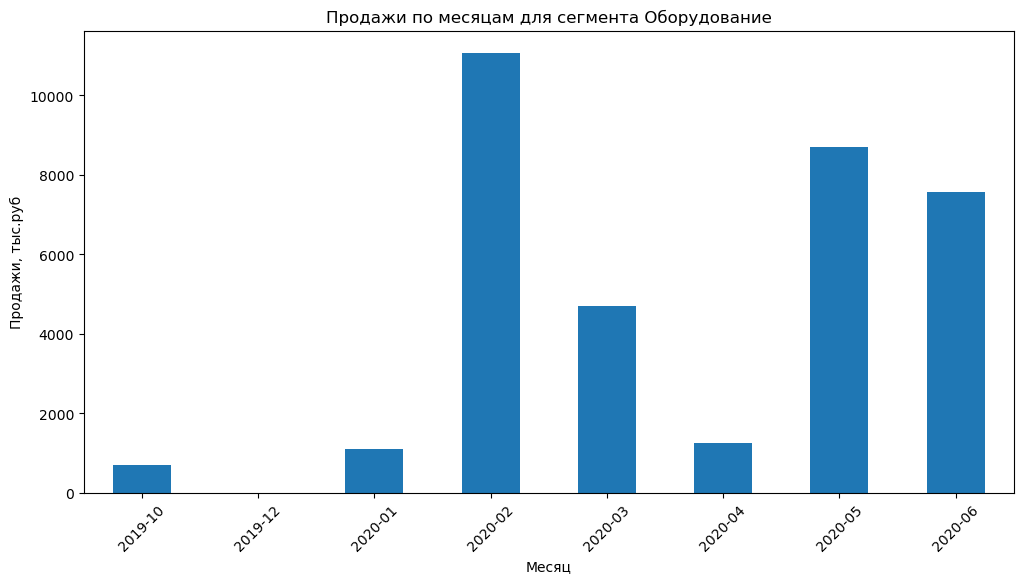

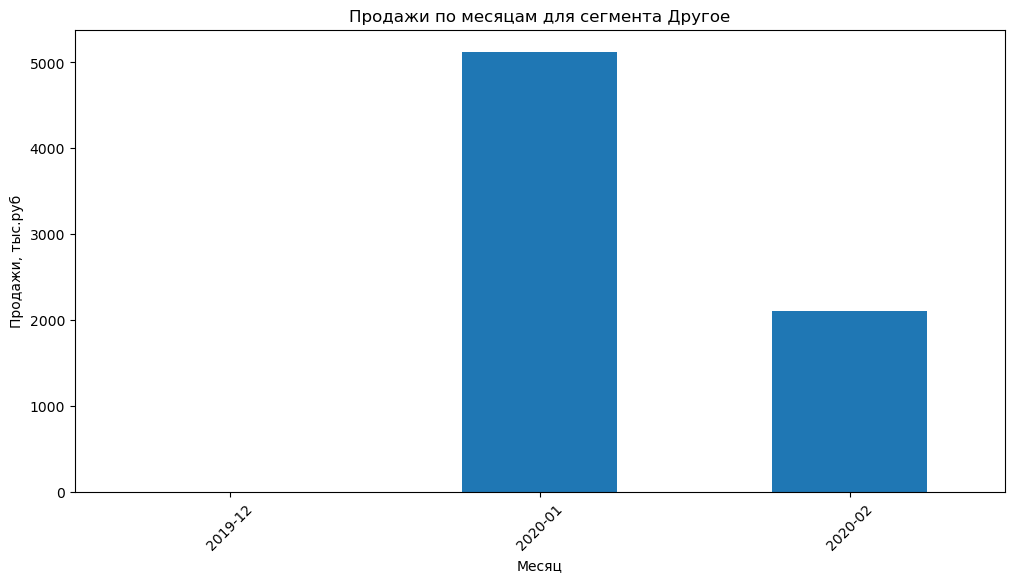

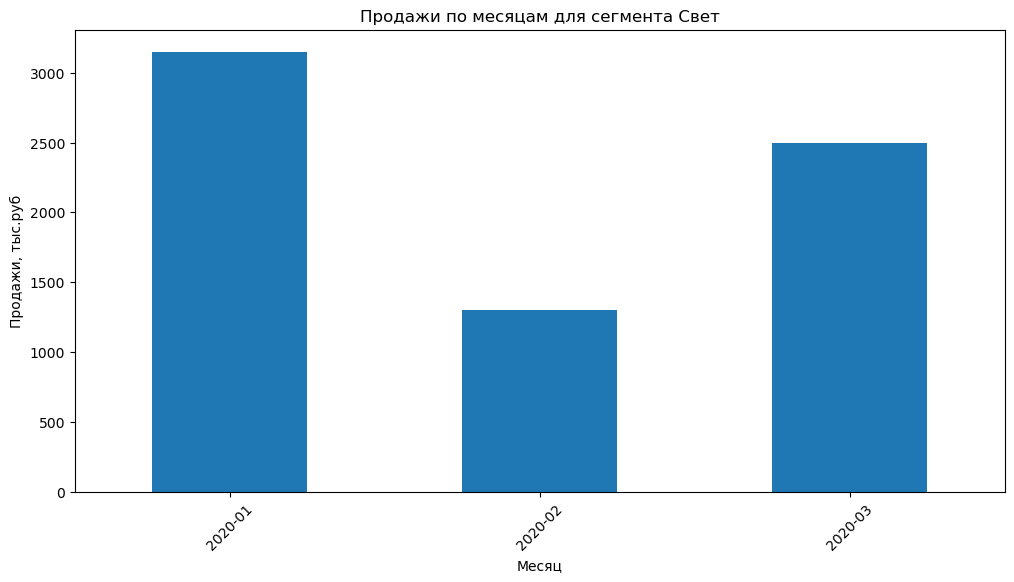

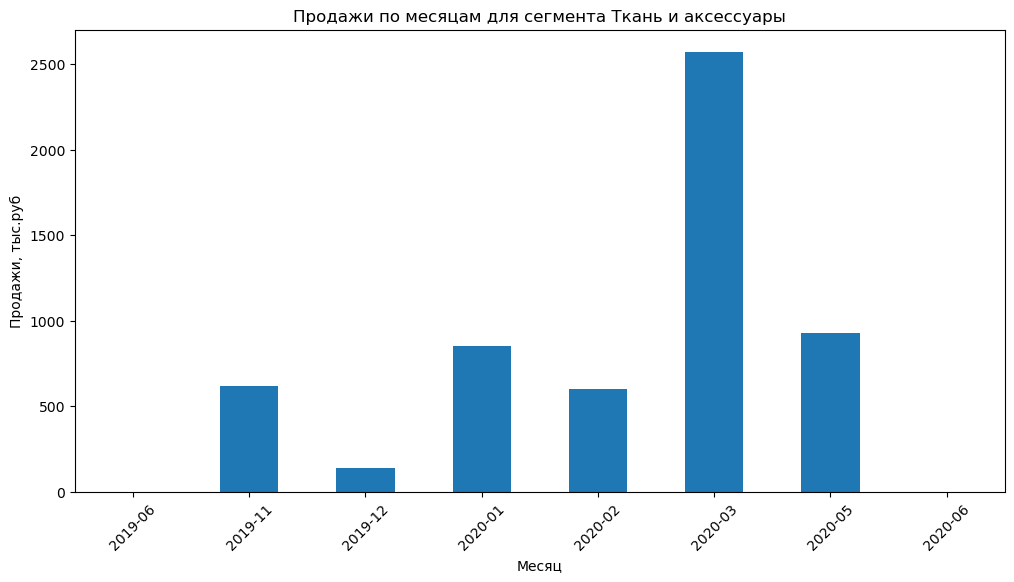

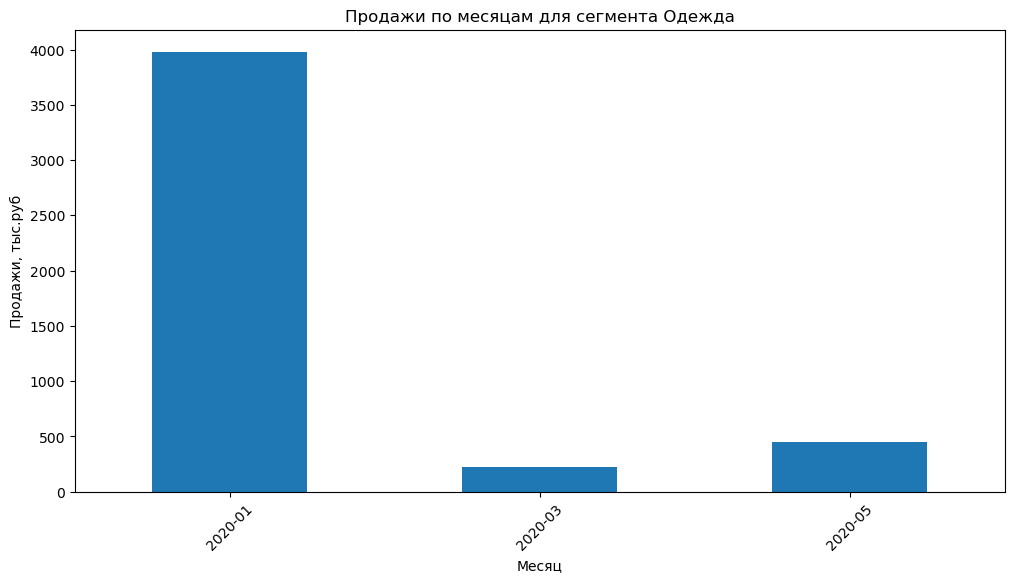

город
Челябинск          8700
Казань             8040
Магнитогорск       7680
Сочи               6950
Новосибирск        5725
Самара             5574
Уфа                4350
Волгоград          4250
Москва             3717
Оренбург           2750
Тула               1850
Нижний Новгород    1635
Кемерово           1500
Санкт-Петербург    1370
Улан-Удэ            970
Пермь               770
Курск               700
Саратов             430
Омск                250
Севастополь           0
Стоврополь            0
Липецк                0
Ярославль             0
Name: продажи факт, тыс.руб, dtype: int64
канал продаж
Вебсайт                0.533333
Выставка               0.801778
Контекстная реклама    0.350000
Почта                  0.387500
Рекомендация           1.105312
Холодный звонок        0.818455
Name: выполнение плана, dtype: float64
канал продаж
Вебсайт                0.666667
Выставка               0.777778
Контекстная реклама    0.625000
Почта                  0.750000
Рекомендация   

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Вычисление выполнения плана по менеджерам
data['выполнение плана'] = data['продажи факт, тыс.руб'] / data['продажи план, тыс.руб']
manager_performance = data.groupby('менеджер')['выполнение плана'].mean()

# Помесячная динамика выполнения плана
data['месяц'] = data['дата сделки'].dt.to_period('M')
monthly_performance = data.groupby('месяц')['выполнение плана'].mean()

# Построение графика помесячной динамики выполнения плана
plt.figure(figsize=(12, 6))
monthly_performance.plot(kind='line')
plt.title('Помесячная динамика выполнения плана')
plt.xlabel('Месяц')
plt.ylabel('Среднее выполнение плана')
plt.xticks(rotation=45)
plt.show()

# Изучение продаж по продуктовым сегментам
segment_sales = data.groupby('продуктовый сегмент')['продажи факт, тыс.руб'].sum().sort_values(ascending=False)
print(segment_sales)

# Построение распределения продаж по месяцам для популярных сегментов
popular_segments = segment_sales.head(5).index
for segment in popular_segments:
    segment_data = data[data['продуктовый сегмент'] == segment]
    monthly_sales = segment_data.groupby('месяц')['продажи факт, тыс.руб'].sum()
    plt.figure(figsize=(12, 6))
    monthly_sales.plot(kind='bar')
    plt.title(f'Продажи по месяцам для сегмента {segment}')
    plt.xlabel('Месяц')
    plt.ylabel('Продажи, тыс.руб')
    plt.xticks(rotation=45)
    plt.show()

# География продаж
region_sales = data.groupby('город')['продажи факт, тыс.руб'].sum().sort_values(ascending=False)
print(region_sales)

# Влияние канала продаж на выполнение плана и конверсию
data['конверсия'] = data['дата оплаты'].notna().astype(int)  # 1 если оплачено, 0 если нет
channel_performance = data.groupby('канал продаж')['выполнение плана'].mean()
channel_conversion = data.groupby('канал продаж')['конверсия'].mean()

print(channel_performance)
print(channel_conversion)

# Продажи по товарным категориям
category_sales = data.groupby('продуктовый сегмент')['продажи факт, тыс.руб'].sum()
category_clients = data.groupby('продуктовый сегмент')['номер заказа'].count()

print(category_sales)
print(category_clients)


# Общий вывод
На основании исследовательского анализа сделайте вывод относительно того, что стоит ли
 - Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
 - Расширять самые доходные каналы продаж, регионы, где есть высокий спрос

На основании выполненного анализа можно сделать следующие выводы:

Профилирование менеджеров: Менеджеров следует профилировать по товарным категориям и каналам продаж. Это поможет определить, где они показывают наилучшие результаты и где нужно улучшение.

Расширение каналов и регионов: Рекомендуется расширять самые доходные каналы продаж и регионы с высоким спросом. Анализ географии продаж и эффективности каналов продаж подскажет, где это целесообразно.